Importando librerias de Qiskit: Operator y QuantumCircuit

In [1]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

Un ejemplo de como construir con Operadores básicos:
El 1er estado de Bell: |Φ+⟩

Circuito para el 1er estado de Bell, |Φ+⟩


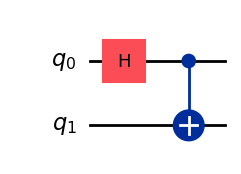

Notación Dirac, para el 1er estado de Bell, |Φ+⟩


<IPython.core.display.Latex object>

In [2]:
circuit = QuantumCircuit(2)
circuit.h(0)      # Operador Hadamard, con el primer qubit 0
circuit.cx(0, 1)  # Operador CNot, con el qubit 0 de control y el qubit 1 como objetivo
print("Circuito para el 1er estado de Bell, |Φ+⟩"); display(circuit.draw("mpl"))

phiPLUS = Statevector(circuit)
print("Notación Dirac, para el 1er estado de Bell, |Φ+⟩"); display(phiPLUS.draw("latex"))



El 2do estado de Bell: |Φ-⟩

Circuito para el 2do estado de Bell, |Φ-⟩


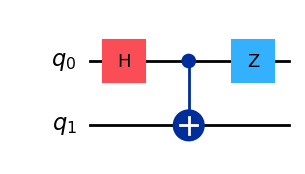

Notación Dirac, para el 2do estado de Bell, |Φ-⟩


<IPython.core.display.Latex object>

In [3]:
circuit = QuantumCircuit(2)
circuit.h(0)      # Operador Hadamard, con el primer qubit 0
circuit.cx(0, 1)  # Operador CNot, con el qubit 0 de control y el qubit 1 como objetivo
circuit.z(0)      # Operador Paulli Z, para el 1er qubit 0 e introducir el signo "-"
print("Circuito para el 2do estado de Bell, |Φ-⟩"); display(circuit.draw("mpl"))

phiMINUS = Statevector(circuit)
print("Notación Dirac, para el 2do estado de Bell, |Φ-⟩"); display(phiMINUS.draw("latex"))

El 3er estado de Bell: |Ψ+⟩

Circuito para el 3er estado de Bell, |Ψ+⟩


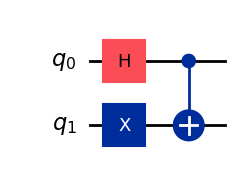

Notación Dirac, para el 3er estado de Bell, |Ψ+⟩


<IPython.core.display.Latex object>

In [4]:
circuit = QuantumCircuit(2)
circuit.x(1)      # Operador Paulli X, con el segundo qubit 1, para cambiar a |01⟩
circuit.h(0)      # Operador Hadamard, con el primer qubit 0
circuit.cx(0, 1)  # Operador CNot, con el qubit 0 de control y el qubit 1 como objetivo
# circuit.z(0)      # Operador Paulli Z, para el 1er qubit 0 e introducir el signo "-"
print("Circuito para el 3er estado de Bell, |Ψ+⟩"); display(circuit.draw("mpl"))

psiPLUS = Statevector(circuit)
print("Notación Dirac, para el 3er estado de Bell, |Ψ+⟩"); display(psiPLUS.draw("latex"))

El 4to estado de Bell: |Ψ-⟩

Circuito para el 4to estado de Bell, |Ψ-⟩


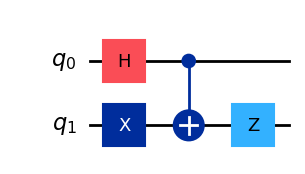

Notación Dirac, para el 4to estado de Bell, |Ψ-⟩


<IPython.core.display.Latex object>

In [5]:
circuit = QuantumCircuit(2)
circuit.x(1)      # Operador Paulli X, con el segundo qubit 1, para cambiar a |01⟩
circuit.h(0)      # Operador Hadamard, con el primer qubit 0
circuit.cx(0, 1)  # Operador CNot, con el qubit 0 de control y el qubit 1 como objetivo
circuit.z(1)      # Operador Paulli Z, para el 1er qubit 0 e introducir el signo "-"
print("Circuito para el 4to estado de Bell, |Ψ-⟩"); display(circuit.draw("mpl"))

psiMINUS = Statevector(circuit)
print("Notación Dirac, para el 4to estado de Bell, |Ψ-⟩"); display(psiMINUS.draw("latex"))

TELETRANSPORTACION CUANTICA (implementación)
Es un protocolo de comunicación cuántica.

Importando librerias, clases y metodos de Qiskit y Numpy

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

Circuito cuántico del protocolo de Teletransportación:
Alice que tiene un qubit (A) desean comunicar ó teletransportar un qubit (Q) a Bob que tiene un qubit (B)

Cubit inicializado 'Q':


<IPython.core.display.Latex object>

Cubit después de las opereciones sobre Alice 'A':


<IPython.core.display.Latex object>

Circuito de Teletransportación, através de un 'ebit' (bit de entrelazamiento, formado por 02 qubits)


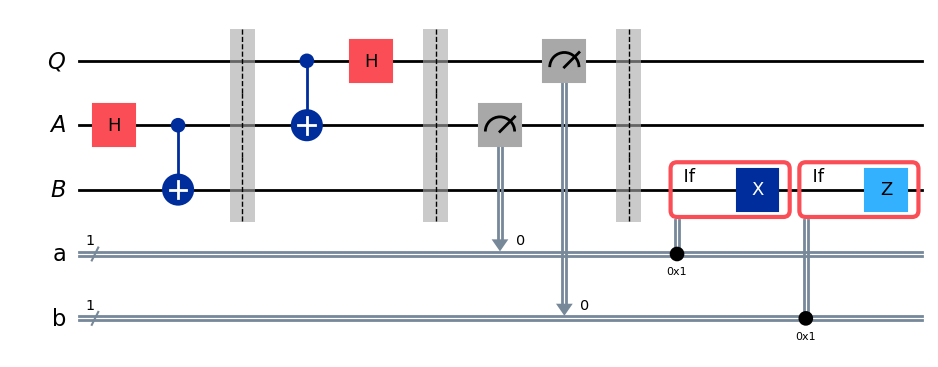

In [10]:
# Se definen: Q (qubit que se desea comunicar), A (qubit de Alice), B (qubit de Bob),
# "a" y "b" (son bits clasicos que se utilizaran para una medición standard de los qubits)
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

# Se inicializa un circuito cuantico
protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Definiendo el "ebit" como el 1er estado de Bell (Inicializando el ebit)
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()
print("Cubit inicializado 'Q':"); 
display(Statevector(protocol).draw("latex"))

# Operaciones con el qubit "Q" que desea comunicar Alice, utilizando su qubit "A"
protocol.cx(qubit, ebit0)   # Aplicando la puerta CNOT
protocol.h(qubit)           # Aplicando la puerta Hadamard
protocol.barrier()
print("Cubit después de las opereciones sobre Alice 'A':"); 
display(Statevector(protocol).draw("latex"))

# Midiendo los qubits y enviando los resultados en los bits "a" y "b" a Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Operaciones con el qubit enviado, ahora en "B" de Bob
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

# Visualizando todo el circuito
print("Circuito de Teletransportación, através de un 'ebit' (bit de entrelazamiento, formado por 02 qubits)" ); 
display(protocol.draw("mpl"))


Probando el circuito de Teletransportación

Puerta qubit unitaria, generada aleatoriamente


<IPython.core.display.Latex object>

Nuevo circuito de Teletransportación, pero incrementando una validación


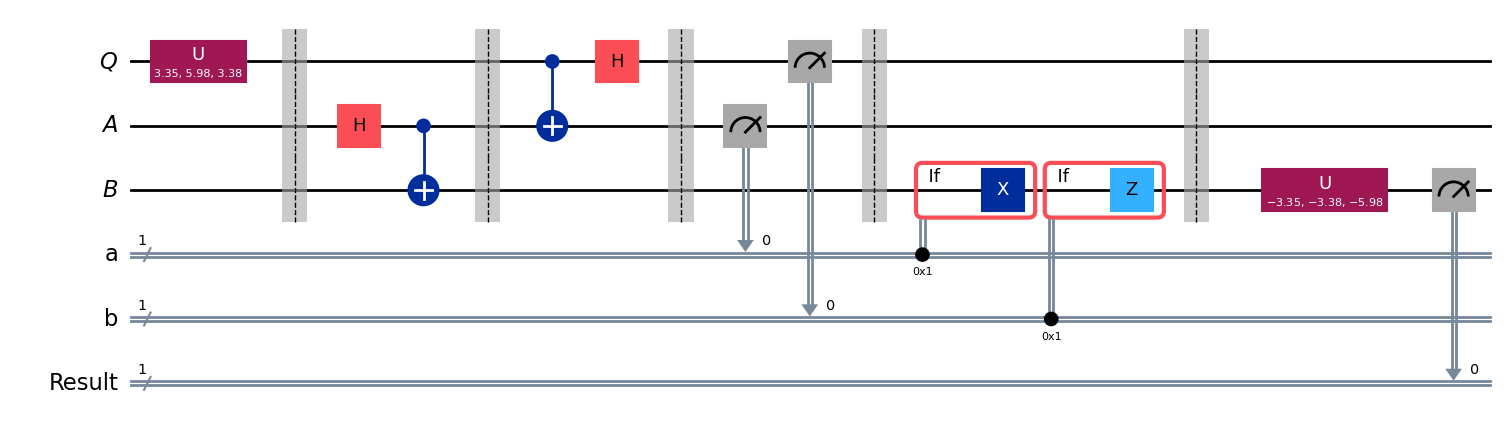

Histograma de los 03 bits de salida clasicos del último Circuito de Teletransportación


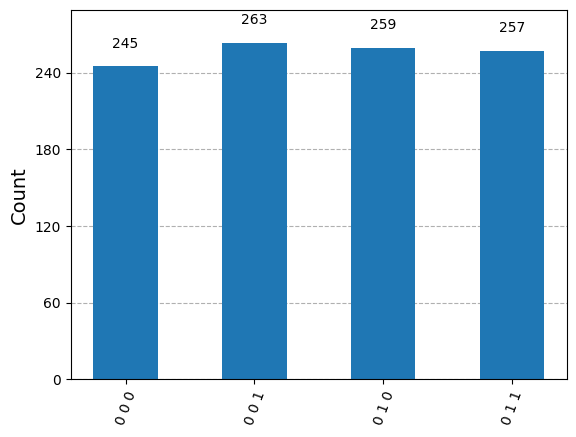

Estadisticas solo del Qubit resultado


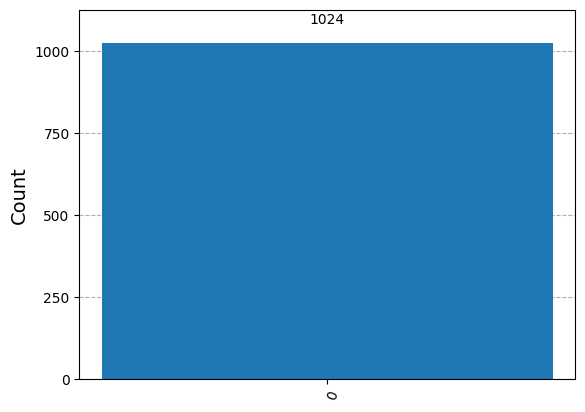

In [41]:
# Primero eligiremos aleatoriamente un puerta qubit unitaria
random_gate = UGate(
    theta=random.random()*2*pi,
    phi=random.random()*2*pi,
    lam=random.random()*2*pi
)
print("Puerta qubit unitaria, generada aleatoriamente"); 
display(array_to_latex(random_gate.to_matrix()))

# Ahora un nuevo circuito que utiliza los qubis y bits, utilizados anteriormente
test =  QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Se inicializa con la puerta qubit unitaria aleatoria, en el qubit "Q"
test.append(random_gate, qubit)
test.barrier()

# Se añadira el circuito de teletransportación definido anteriormente "protocol"
test = test.compose(protocol)
test.barrier()

# Finanmente se aplica la inversa de la puerta qubit unitaria a "B" y se hace la medición
test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)
print("Nuevo circuito de Teletransportación, pero incrementando una validación")
display(test.draw(output="mpl"))

# Por último, haremos una simulación con "Aer" y trazaremos un histograma de los bits de salida
result = AerSimulator().run(test).result()
statistics = result.get_counts()
print("Histograma de los 03 bits de salida clasicos del último Circuito de Teletransportación")
display(plot_histogram(statistics))

# Filtraremso tambien las estadisticas del qubit del resultado de la prueba
filtered_statistics = marginal_distribution(statistics, [2])
print("Estadisticas solo del Qubit resultado")
display(plot_histogram(filtered_statistics))